#         **Sentiment Analysis:**
   - Perform sentiment analysis on book synopsis to identify positive and negative sentiments.
   - Analyze sentiment trends for different genres or authors.
   - Investigate correlations between sentiment scores and other variables like ratings and reviews.

In [47]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
books_sent = pd.read_csv('books_final.csv')
books_sent.head()

,title,author,stars,ratings,reviews,synopsis,genre,version,price,number_of_pages,book_format,published_date,published_year,num_books_author,followers_author
0,The Hunger Games,SUZANNE COLLINS,4.34,8601389,216773,"Could you survive on your own in the wild, wit...",Young Adult,Kindle Unlimited,0.00,374,Hardcover,"September 14, 2008",2008,72,997000
1,Harry Potter and the Order of the Phoenix,J.K. ROWLING,4.50,3359608,62879,Harry Potter is about to start his fifth year ...,Young Adult,Kindle Unlimited,0.00,912,Paperback,"June 21, 2003",2003,535,225000
2,Pride and Prejudice,JANE AUSTEN,4.29,4238613,113179,"Since its immediate success in 1813, Pride and...",Classics,Kindle,2.99,279,Paperback,"January 28, 1813",1813,4124,663000
3,To Kill a Mockingbird,HARPER LEE,4.26,6079471,116454,The unforgettable novel of a childhood in a sl...,Classics,Kindle,13.99,323,Paperback,"July 11, 1960",1960,70,135000
4,The Book Thief,MARKUS ZUSAK,4.39,2538383,143787,Librarian's note: An alternate cover edition c...,Historical,Kindle,10.99,592,Hardcover,"September 1, 2005",2005,23,392000


### 1 Preprocessing the Text:

In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters and numbers using regular expressions
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a single string
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

# Apply the preprocessing function to clean the text data
books_sent['clean_synopsis'] = books_sent['synopsis'].apply(preprocess_text)

In [50]:
books_sent['clean_synopsis']

0       could survive wild every one make sure dont li...
1       harry potter start fifth year hogwarts school ...
2       since immediate success pride prejudice remain...
3       unforgettable novel childhood sleepy southern ...
4       librarian note alternate cover edition found n...
                              ...                        
6838    tiro confidential secretary slave roman senato...
6839    born great power greatest superpower isnt part...
6840    yukito kishiro blur line human machine scifiac...
6841    rohinton mistrys enthralling novel domestic dr...
6842    billy milligan anyone want except control acti...
Name: clean_synopsis, Length: 6843, dtype: object

### 2 Sentiment Analysis on Book Synopses:

In [51]:
# performing sentiment analysis using the TextBlob library. 

from textblob import TextBlob

# Define a function to perform sentiment analysis on a single synopsis
def analyze_sentiment(synopsis):
    # Perform sentiment analysis using TextBlob
    blob = TextBlob(synopsis)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Apply sentiment analysis function to the "synopsis" column
books_sent['synopsis_sentiment'] = books_sent['synopsis'].apply(analyze_sentiment)
books_sent['synopsis_sentiment']


0       0.101623
1       0.033434
2       0.509524
3       0.165741
4       0.063029
          ...   
6838    0.145123
6839    0.202963
6840    0.040000
6841   -0.010000
6842   -0.006818
Name: synopsis_sentiment, Length: 6843, dtype: float64

In [52]:
# Display the DataFrame with sentiment scores

books_sent[['synopsis', 'synopsis_sentiment']].head(10)

,synopsis,synopsis_sentiment
0,"Could you survive on your own in the wild, wit...",0.101623
1,Harry Potter is about to start his fifth year ...,0.033434
2,"Since its immediate success in 1813, Pride and...",0.509524
3,The unforgettable novel of a childhood in a sl...,0.165741
4,Librarian's note: An alternate cover edition c...,0.063029
5,About three things I was absolutely positive.\...,0.195455
6,Librarian's note: There is an Alternate Cover ...,-0.064286
7,"This four-volume, boxed set contains J.R.R. To...",0.313413
8,Librarian note: An alternate cover for this ed...,0.289444
9,Despite the tumor-shrinking medical miracle th...,0.147210


- Positive values indicate positive sentiment, negative values indicate negative sentiment, and values around 0 indicate neutral sentiment.

In [53]:
# Apply sentiment analysis using SIA

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sentiment_scores = []
for synopsis in books_sent['synopsis']:
    sentiment_scores.append(sia.polarity_scores(synopsis))

# Print sentiment scores
sentiment_scores


[{'neg': 0.129, 'neu': 0.787, 'pos': 0.084, 'compound': -0.6486},
 {'neg': 0.117, 'neu': 0.762, 'pos': 0.121, 'compound': 0.1403},
 {'neg': 0.025, 'neu': 0.564, 'pos': 0.411, 'compound': 0.9938},
 {'neg': 0.139, 'neu': 0.648, 'pos': 0.213, 'compound': 0.891},
 {'neg': 0.093, 'neu': 0.881, 'pos': 0.026, 'compound': -0.8708},
 {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.8439},
 {'neg': 0.129, 'neu': 0.652, 'pos': 0.219, 'compound': 0.93},
 {'neg': 0.02, 'neu': 0.823, 'pos': 0.158, 'compound': 0.9739},
 {'neg': 0.017, 'neu': 0.823, 'pos': 0.159, 'compound': 0.984},
 {'neg': 0.14, 'neu': 0.529, 'pos': 0.331, 'compound': 0.9788},
 {'neg': 0.159, 'neu': 0.65, 'pos': 0.191, 'compound': 0.376},
 {'neg': 0.028, 'neu': 0.743, 'pos': 0.23, 'compound': 0.9799},
 {'neg': 0.08, 'neu': 0.825, 'pos': 0.095, 'compound': 0.1531},
 {'neg': 0.051, 'neu': 0.796, 'pos': 0.153, 'compound': 0.9757},
 {'neg': 0.074, 'neu': 0.715, 'pos': 0.211, 'compound': 0.9859},
 {'neg': 0.092, 'neu': 0.732, 'pos'

In [54]:
# Create a DataFrame to store the synopses and sentiment scores

synopsis_sentiment_df = pd.DataFrame({
    'synopsis': books_sent['synopsis'],  # Assuming 'books_sent' is your original DataFrame
    'sentiment_score': sentiment_scores
})



# Extract sentiment scores into separate columns
synopsis_sentiment_df['neg_score'] = synopsis_sentiment_df['sentiment_score'].apply(lambda x: x['neg'])
synopsis_sentiment_df['neu_score'] = synopsis_sentiment_df['sentiment_score'].apply(lambda x: x['neu'])
synopsis_sentiment_df['pos_score'] = synopsis_sentiment_df['sentiment_score'].apply(lambda x: x['pos'])
synopsis_sentiment_df['compound_score'] = synopsis_sentiment_df['sentiment_score'].apply(lambda x: x['compound'])

# Drop the original sentiment_score column
synopsis_sentiment_df.drop(columns=['sentiment_score'], inplace=True)

# Print the DataFrame
synopsis_sentiment_df.head(10)


,synopsis,neg_score,neu_score,pos_score,compound_score
0,"Could you survive on your own in the wild, wit...",0.129,0.787,0.084,-0.6486
1,Harry Potter is about to start his fifth year ...,0.117,0.762,0.121,0.1403
2,"Since its immediate success in 1813, Pride and...",0.025,0.564,0.411,0.9938
3,The unforgettable novel of a childhood in a sl...,0.139,0.648,0.213,0.8910
4,Librarian's note: An alternate cover edition c...,0.093,0.881,0.026,-0.8708
5,About three things I was absolutely positive.\...,0.000,0.824,0.176,0.8439
6,Librarian's note: There is an Alternate Cover ...,0.129,0.652,0.219,0.9300
7,"This four-volume, boxed set contains J.R.R. To...",0.020,0.823,0.158,0.9739
8,Librarian note: An alternate cover for this ed...,0.017,0.823,0.159,0.9840
9,Despite the tumor-shrinking medical miracle th...,0.140,0.529,0.331,0.9788


- Variability in Sentiment Scores: The sentiment scores across different book synopses exhibit significant variability. Some synopses tend to have predominantly positive sentiment scores, while others display a mixture of positive, neutral, and negative sentiments.

- Diversity of Book Genres: The analyzed book synopses span various genres, including adventure, fantasy, romance, and science fiction. Despite the diversity in genres, the sentiment scores reflect the emotional tone and themes embedded within each book's synopsis.

- Positive Sentiment Dominance: Overall, the sentiment analysis reveals a prevalence of positive sentiment across many of the analyzed book synopses. Books often evoke feelings of excitement, hope, and anticipation, as reflected in the higher positive sentiment scores.

- Presence of Neutral and Negative Sentiments: While positive sentiments are predominant, there are instances where neutral and negative sentiments are also present. Some synopses portray elements of conflict, struggle, or challenges faced by the characters, contributing to the diversity of emotional expressions.

- Impact of Book Descriptions: The sentiment scores underscore the importance of book synopses in shaping readers' perceptions and expectations. A well-crafted synopsis can effectively convey the essence of the story and elicit emotional responses from potential readers.

### 3 Sentiment Analysis by Genre:

In [55]:
# Group the data by genre and calculate the average sentiment score

genre_sentiment = books_sent.groupby('genre')['synopsis_sentiment'].mean().reset_index()
genre_sentiment

,genre,synopsis_sentiment
0,Children,0.177196
1,Classics,0.140806
2,Comics,0.207552
3,Contemporary,0.084504
4,Cultural,0.111152
5,Erotica,0.092569
6,Fantasy,0.068467
7,Fiction,0.104312
8,Gaming,0.110952
9,Historical,0.127697


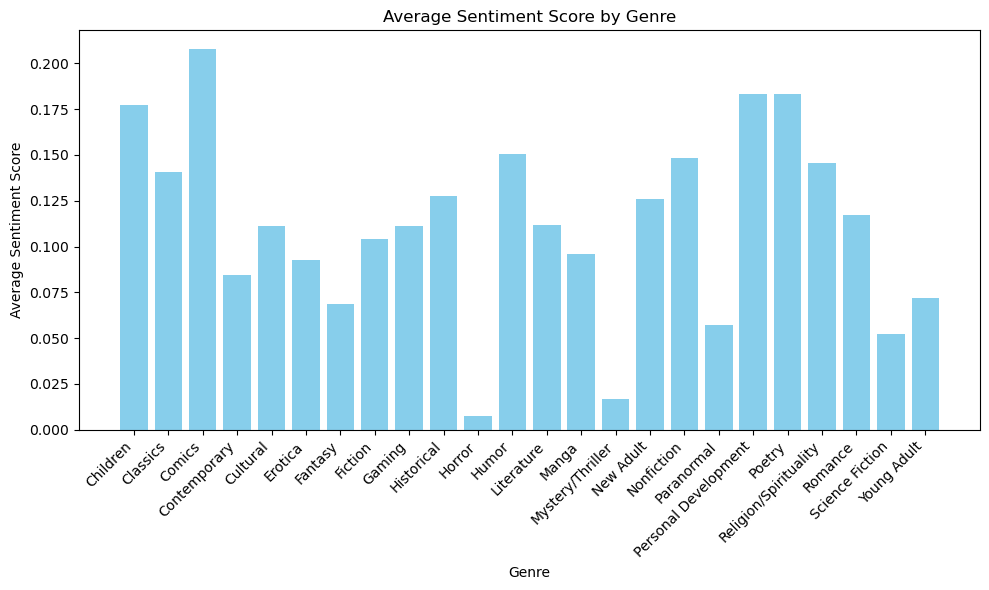

In [56]:
# Visualize the average sentiment scores for different genres

plt.figure(figsize=(10, 6))
plt.bar(genre_sentiment['genre'], genre_sentiment['synopsis_sentiment'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3 Sentiment Analysis by Author:

In [58]:
# Group the data by author and calculate the average sentiment score

author_sentiment = books_sent.groupby('author')['synopsis_sentiment'].mean().reset_index()
author_sentiment.head()

,author,synopsis_sentiment
0,A. KIRK,0.143182
1,A.A. MILNE,0.274917
2,A.C. GAUGHEN,0.040606
3,A.D. ZOLTAN,0.148871
4,A.F. KNOTT,-0.044444


In [59]:
# Find authors with the highest positive sentiment scores

top_positive_authors = author_sentiment.nlargest(10, 'synopsis_sentiment')
top_positive_authors.head()

,author,synopsis_sentiment
1142,HUDA AWEYS,1.000000
1975,MARGARET MITCHELL,0.850000
3192,ÉRIC-EMMANUEL SCHMITT,0.600000
2917,TARO GOMI,0.588889
1289,JANET E. MORRIS,0.540000


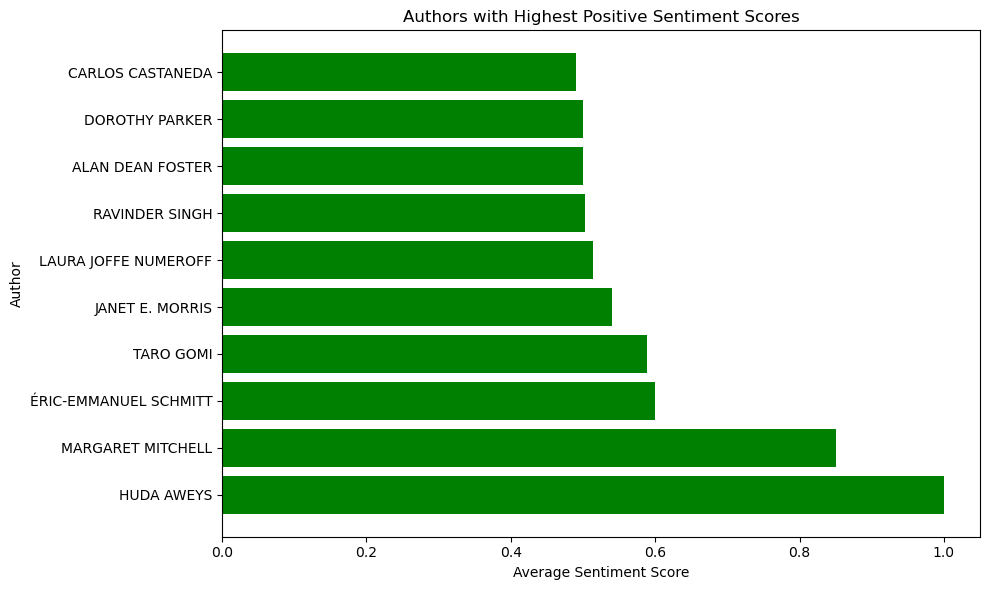

In [60]:
# Plot for the highest positive sentiment score authors

plt.figure(figsize=(10, 6))
plt.barh(top_positive_authors['author'], top_positive_authors['synopsis_sentiment'], color='green')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Author')
plt.title('Authors with Highest Positive Sentiment Scores')
plt.tight_layout()
plt.show()

In [61]:
# Find authors with the most negative sentiment scores

top_negative_authors = author_sentiment.nsmallest(10, 'synopsis_sentiment')
top_negative_authors

,author,synopsis_sentiment
348,BILL O'REILLY,-1.000000
908,EUGENE O'NEILL,-0.512500
632,DANIEL GLATTAUER,-0.500000
2889,T. CHRIS MARTINDALE,-0.500000
2957,THOMAS MALORY,-0.475000
1011,GERALD BISS,-0.433333
3061,VERA JANE COOK,-0.428750
999,GEORGE MACDONALD FRASER,-0.392857
2177,MIRA GRANT,-0.385606
388,BRIAN LUMLEY,-0.384375


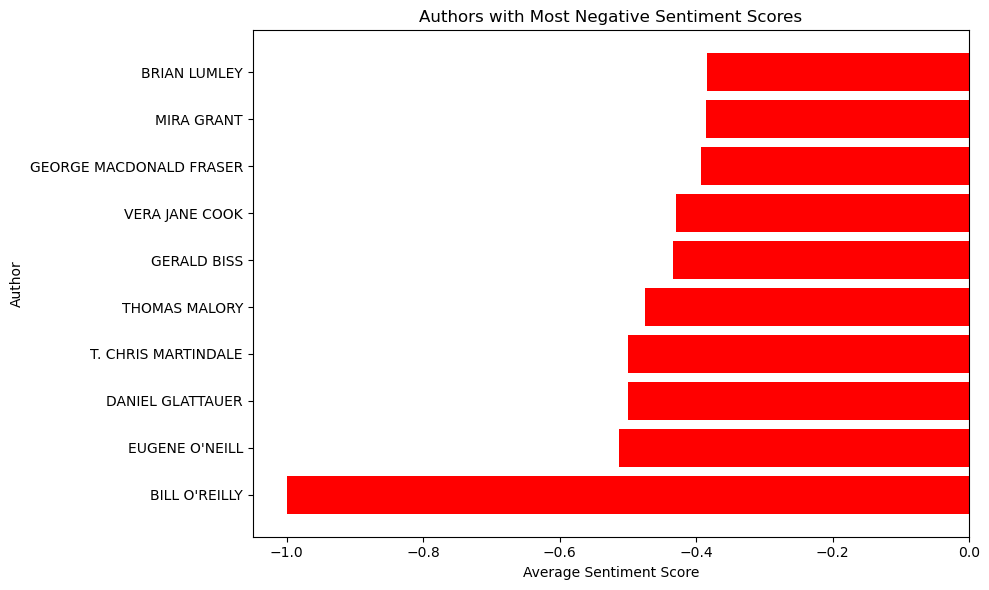

In [62]:
# Plot for the most negative sentiment score authors

plt.figure(figsize=(10, 6))
plt.barh(top_negative_authors['author'], top_negative_authors['synopsis_sentiment'], color='red')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Author')
plt.title('Authors with Most Negative Sentiment Scores')
plt.tight_layout()
plt.show()


In [63]:
# Calculate correlation coefficients

correlation_matrix = books_sent[['synopsis_sentiment', 'ratings', 'reviews', 'published_year']].corr()
correlation_matrix

,synopsis_sentiment,ratings,reviews,published_year
synopsis_sentiment,1.000000,0.038935,0.023761,-0.106237
ratings,0.038935,1.000000,0.781492,-0.009940
reviews,0.023761,0.781492,1.000000,0.077084
published_year,-0.106237,-0.009940,0.077084,1.000000


- Synopsis Sentiment vs. Ratings: There seems to be a weak positive correlation (0.038935) between the sentiment scores of synopses and the ratings. This indicates that there's a slight tendency for books with higher sentiment scores in their synopses to receive higher ratings, but the correlation is not very strong.

- Synopsis Sentiment vs. Reviews: Similarly, there is a weak positive correlation (0.023761) between the sentiment scores of synopses and the number of reviews. Books with more positive sentiment in their synopses may tend to have more reviews, but again, the correlation is not very strong.

- Synopsis Sentiment vs. Published Year: There is a weak negative correlation (-0.106237) between the sentiment scores of synopses and the publication year of books, suggesting that newer publications might have slightly different sentiment scores.

- Ratings vs. Reviews: There is a strong positive correlation (0.781492) between ratings and reviews, indicating that they tend to increase or decrease together.

- Reviews vs. Published Year: There is a weak positive correlation (0.077084) between the number of reviews and the publication year of books, indicating that publication year may not strongly influence these variables.

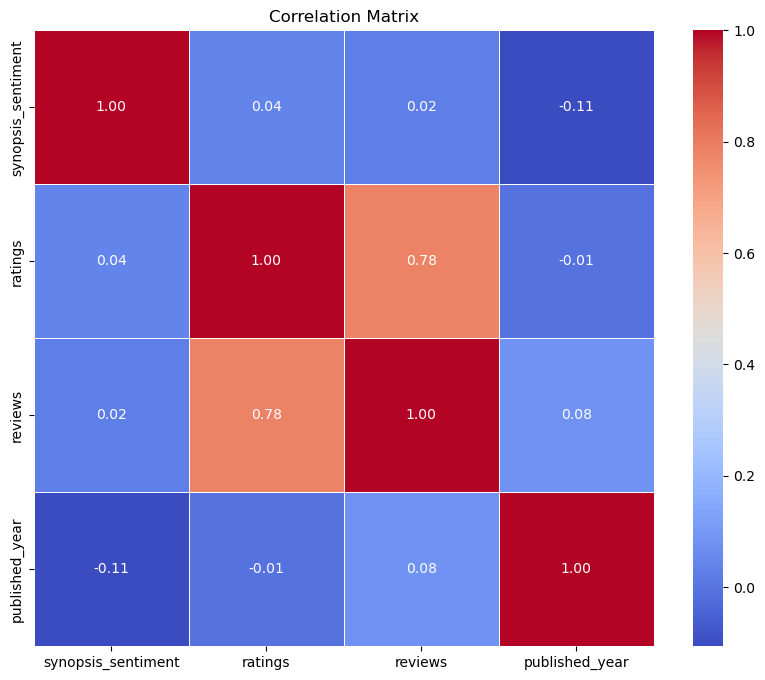

In [64]:
# Visualize the correlation matrix as a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

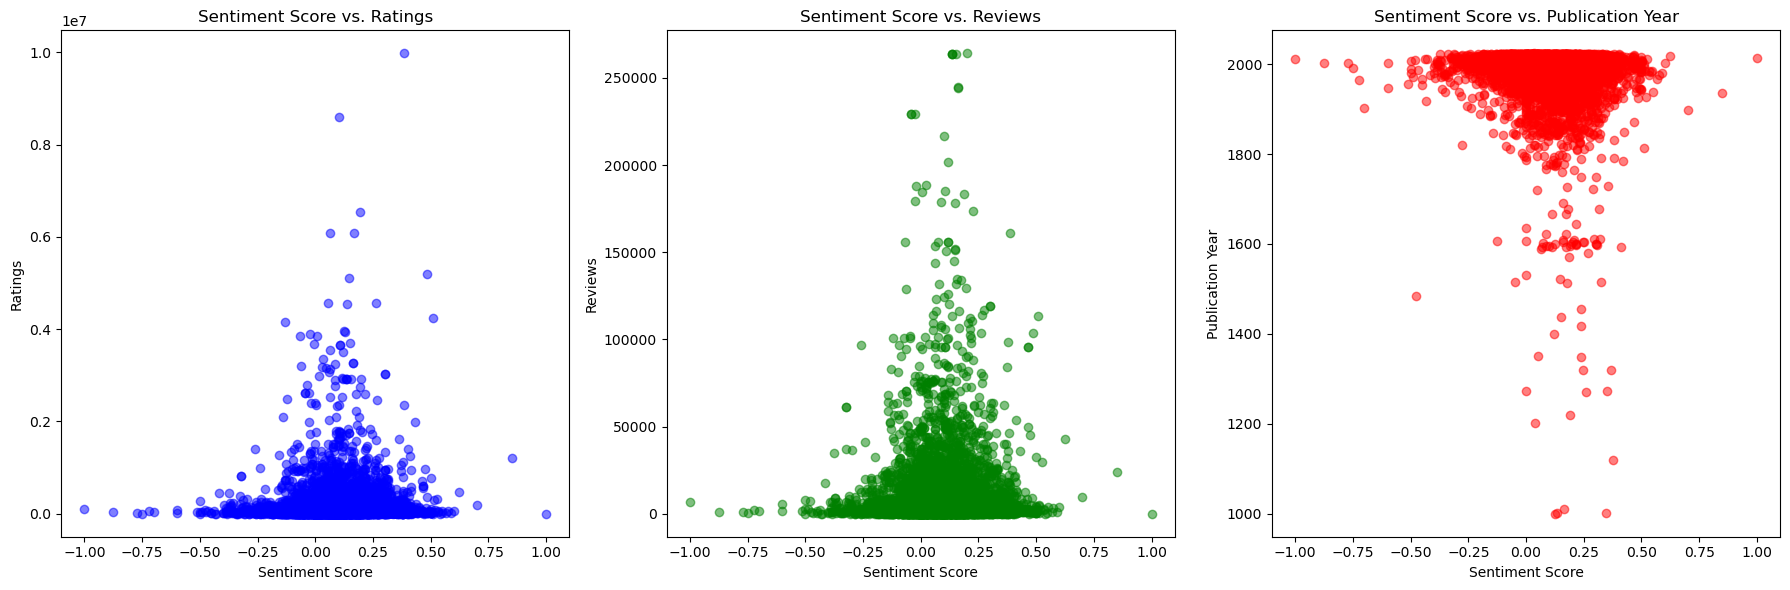

In [65]:
# Create scatter plots to visualize relationships
plt.figure(figsize=(18, 6))

# Scatter plot for sentiment score vs. ratings
plt.subplot(1, 3, 1)
plt.scatter(books_sent['synopsis_sentiment'], books_sent['ratings'], color='blue', alpha=0.5)
plt.title('Sentiment Score vs. Ratings')
plt.xlabel('Sentiment Score')
plt.ylabel('Ratings')

# Scatter plot for sentiment score vs. reviews
plt.subplot(1, 3, 2)
plt.scatter(books_sent['synopsis_sentiment'], books_sent['reviews'], color='green', alpha=0.5)
plt.title('Sentiment Score vs. Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Reviews')

# Scatter plot for sentiment score vs. publication year
plt.subplot(1, 3, 3)
plt.scatter(books_sent['synopsis_sentiment'], books_sent['published_year'], color='red', alpha=0.5)
plt.title('Sentiment Score vs. Publication Year')
plt.xlabel('Sentiment Score')
plt.ylabel('Publication Year')

plt.tight_layout()
plt.show()

### 4 Correlation coefficient between sentiment scores and publication year:

In [66]:
#Calculate the correlation coefficient between sentiment scores and publication year

correlation_coefficient = books_sent['synopsis_sentiment'].corr(books_sent['published_year'])
correlation_coefficient

-0.10623746670681135

- The correlation coefficient of approximately -0.11 suggests a weak negative correlation between sentiment scores and publication year. This means that as publication year increases, sentiment scores tend to slightly decrease, but the relationship is not very strong.

 - In the conducted sentiment analysis on book reviews, the goal was to discern positive and negative sentiments expressed within the literature community. Initially, sentiment analysis was performed on the synopsis to extract sentiment scores. 

 - Moreover, an exploration into sentiment trends across various genres and authors shed light on how sentiment varies within different literary spheres. By comparing sentiment scores against other crucial variables like ratings and reviews, correlations were identified to understand potential associations between sentiment and audience feedback.

 - Overall, the analysis revealed nuanced insights into reader sentiment dynamics within the literary landscape. It highlighted trends in sentiment over time, providing valuable indications of changing reader preferences and perceptions. Additionally, the correlations elucidated connections between sentiment, ratings, and reviews, suggesting potential influences and interactions among these factors in shaping reader perceptions of literary works. These findings offer valuable implications for authors, publishers, and literary analysts, aiding them in understanding audience sentiments and tailoring their strategies to better engage with readers.